## 분류
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info:
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed:
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로드하기

In [2]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 전처리

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df = df.dropna()
df.shape

(7032, 20)

In [7]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## 학습, 예측 데이터셋 나누기

### 정답값이자 예측해야 될 값

In [8]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Churn"
label_name

'Churn'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [21]:
# X, y를 만들어 줍니다.
X = df.drop(columns=label_name)
y = df[label_name]

In [22]:
cat_col = X.select_dtypes(include="O").columns
X[cat_col] = X[cat_col].astype("category")
X[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [23]:
X_train = df.sample(frac=0.8, random_state=42)
X_test = df.drop(X_train.index)

X_train.shape, X_test.shape

((5626, 20), (1406, 20))

In [24]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [25]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


In [26]:
from sklearn.model_selection import train_test_split

X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [27]:
X_train_raw.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
6981-TDRFT,Male,0,Yes,Yes,44,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,54.3,2317.1


In [28]:
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [29]:
X.select_dtypes(include="category").columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [30]:
X.select_dtypes(include="number").columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## One-hot-Encoding

* 데이터 인코딩 시 주의 사항
* [Data Leakage 규칙 관련 상세 설명 - DACON](https://dacon.io/competitions/official/236055/talkboard/407731?page=1&dtype=recent)


* Ordinal encoding과 One hot encoding은 범주형 변수(categorical variable)를 수치형 변수(numerical variable)로 변환하는 방법입니다.

Ordinal encoding은 범주형 변수에 정해진 순서나 등급이 있을 때 사용합니다. 예를 들어, 옷의 크기를 나타내는 S, M, L, XL과 같은 값은 순서가 있으므로 이러한 범주형 변수를 정수값으로 변환할 수 있습니다. 이 때, 크기 순서에 따라 S=1, M=2, L=3, XL=4과 같은 방식으로 범주를 정수로 매핑합니다.

반면에, One hot encoding은 범주형 변수의 모든 값을 이진수(binary)로 표현하는 방법입니다. 예를 들어, 색상이 빨강, 파랑, 노랑으로 구분되는 경우, One hot encoding을 사용하면 각 색상을 0 또는 1의 값으로 변환할 수 있습니다. 즉, 빨강은 [1, 0, 0], 파랑은 [0, 1, 0], 노랑은 [0, 0, 1]과 같은 방식으로 범주형 변수를 변환합니다. 이 방법은 각 범주에 대해 하나의 이진 변수를 만들어서 해당 범주에 해당하는 경우 1, 아니면 0으로 표현합니다.

Ordinal encoding과 One hot encoding은 각각의 장단점이 있습니다. Ordinal encoding은 범주형 변수의 순서나 등급을 반영하여 정보를 유지할 수 있지만, 변수의 크기가 순서와 상관 없이 숫자로 표현되기 때문에 모델 학습에 문제가 발생할 수 있습니다. One hot encoding은 범주형 변수의 모든 값을 고려하여 정보를 유지하지만, 변수가 많아질수록 변환된 변수의 차원이 늘어나게 되어 모델 학습에 필요한 데이터의 양이 증가할 수 있습니다.


* https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
# column_trans = ColumnTransformer(
#     [('categories', OneHotEncoder(dtype='int'),
#       X.select_dtypes(exclude="number").columns.tolist())],
#     remainder=MinMaxScaler(), verbose_feature_names_out=False)


# column_trans.fit(X_train)

In [32]:
column_trans = ColumnTransformer(
    [('categories', OneHotEncoder(dtype='int'),
      X.select_dtypes(exclude="number").columns.tolist())],
    remainder='passthrough', verbose_feature_names_out=False)

column_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categories', OneHotEncoder(dtype='int'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])],
                  verbose_feature_names_out=False)

In [33]:
pd.DataFrame(column_trans.fit_transform(X_train),
    columns=column_trans.get_feature_names_out()).describe()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5626,5626,5626,5626,5626,5626,5626,5626,5626,5626,...,5626,5626,5626,5626,5626,5626,5626,5626.00,5626.0,5626
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,72,1496.00,5282.0,2
top,0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,20.05,20.2,No
freq,2831,2831,2879,2879,3910,3910,5075,5075,2937,5075,...,3319,4385,4389,3757,4347,4736,497,47.00,11.0,4147


In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
      (StandardScaler(),
       make_column_selector(dtype_include=np.number)),
      (OneHotEncoder(handle_unknown="ignore"),
       make_column_selector(dtype_include="category")))

In [39]:
X_train = pd.DataFrame(column_trans.fit_transform(X_train_raw),
    columns=column_trans.get_feature_names_out())

In [40]:
X_valid = pd.DataFrame(column_trans.transform(X_valid_raw),
    columns=column_trans.get_feature_names_out())

In [41]:
X_train.head(2)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,44.0,54.30,2317.1
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,62.0,24.25,1424.6


## 데이터 샘플링

### 현실 속 데이터

* 실제로 데이터를 탐색하다 보면 불균형한 데이터가 매우 많습니다.
* 1년 중 눈이 오는 날과 눈이 오지 않는 날
* 공장에서 정상 제품과 불량품
* 등 5대 5로 균형 있게 분포되어 있는 분류 문제가 더 드뭅니다.
* 이런 경우 어떻게 대처해야 할까요?

### under-sampling과 over-sampling

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png"/>

* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
<br><br>
* 이런 문제를 해결하기 위해서 불균형한 데이터는 전체 데이터에서 샘플링을 하는 방식을 달리합니다.
* 방법은 크게 under-sampling과 over-sampling 두 가지가 있습니다.
* 주요 골자는 두 값의 비율이 비슷하게 맞춰주는 것입니다.
* under-sampling은 더 값이 많은 쪽에서 일부만 샘플링하여 비율을 맞춰주는 방법입니다.
* over-sampling은 더 값이 적은 쪽에서 값을 늘려 비율을 맞춰준 방법입니다.
* under-sampling은 구현이 쉽지만 전체 데이터가 줄어 머신러닝 모델 성능이 떨어질 우려가 있습니다.

### SMOTE(Synthetic Minority Over-sampling Technique)


* 클래스 불균형 문제: 많은 실제 세계 데이터셋에서, 특정 클래스의 예시가 다른 클래스에 비해 현저히 적은 경우가 많습니다. 예를 들어, 사기 거래 탐지, 희귀 질병 진단 등에서 이런 문제가 발생합니다.
* 소수 클래스의 예시가 부족하면, 머신러닝 모델이 다수 클래스에 편향되어 소수 클래스를 제대로 학습하지 못하는 문제가 발생합니다.
* SMOTE는 Synthetic Minority Over-sampling Technique의 약자로 합성 소수자 오버샘플링 기법입니다.
* 적은 값을 늘릴 때, k-근접 이웃의 값을 이용하여 합성된 새로운 값을 추가합니다.
* k-근접 이웃이란 가장 가까운 k개 이웃을 의미합니다.

* 작동 방법
    * 임의의 소수 클래스 예시 선택: 먼저, 소수 클래스에서 임의의 예시를 선택합니다.
    * k-최근접 이웃 찾기: 선택한 예시의 k-최근접 이웃(nearest neighbors) 중 하나를 무작위로 선택합니다.
    * 새로운 예시 생성: 선택한 예시와 그 이웃 사이에 위치한 새로운 데이터 포인트를 생성합니다. 이는 두 예시 사이를 선형적으로 보간하여 생성합니다.
    
* 한계
    * SMOTE는 데이터의 특성을 고려하지 않고 합성 예시를 생성하기 때문에, 때때로 잘못된 패턴을 학습할 수도 있습니다.
    * 극도로 불균형한 데이터셋이나 복잡한 데이터 구조에서는 효과가 제한적일 수 있습니다.
* https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png"/>

* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
<br><br>

* https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



In [42]:
#  SMOTE를 적용할 때 주의해야 할 점은, 반드시 훈련 데이터셋에만 적용해야 한다는 것입니다.
# 테스트 데이터셋에 SMOTE를 적용하면, 인위적인 데이터로 모델을 평가하게 되어 실제 성능을 정확하게 측정할 수 없습니다.
from imblearn.over_sampling import SMOTE
# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((9304, 45), (9304,))

In [43]:
y_train_smote.value_counts()

No     4652
Yes    4652
Name: Churn, dtype: int64

## 로지스틱 회귀(LogisticRegression)
* 로지스틱 회귀는 주어진 데이터를 기반으로 어떤 카테고리(주로 두 개의 카테고리)에 속할 확률을 예측하는 데 사용됩니다.
* 로지스틱 회귀는 선형 회귀와 유사하게 데이터의 가중합을 계산하지만, 결과값을 로지스틱 함수(또는 시그모이드 함수)를 통해 0과 1 사이의 값으로 변환합니다. 이 값은 특정 카테고리에 속할 확률로 해석됩니다.
* 계수 (Coefficients): 로지스틱 회귀 모델의 각 계수는 해당 피처가 결과에 미치는 영향의 크기와 방향을 나타냅니다. 계수가 양수이면, 해당 피처의 값이 증가할수록 카테고리 1에 속할 확률이 증가합니다.
* 확률 예측: 모델은 각 관측치에 대해 카테고리 1에 속할 확률을 예측합니다. 이를 기반으로 분류 결정을 내릴 수 있습니다.
* 성능 평가: 혼동 행렬(Confusion Matrix), 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 등을 통해 모델의 성능을 평가합니다.

In [44]:
# 트리모델 로드하기
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

## 선형 판별 분석(Linear Discriminant Analysis, LDA)


* 클래스 내 분산 (Within-Class Variance)
    * 클래스 내 분산은 각 클래스 내의 데이터 포인트가 그 클래스의 평균에 얼마나 가깝게 분포하는지를 측정합니다.
    * 각 클래스 내의 각 데이터 포인트와 클래스 평균 사이의 거리의 제곱합으로 계산됩니다.
    * 클래스 내 분산이 작을수록 같은 클래스에 속하는 데이터 포인트들이 서로 가깝게 모여 있음을 의미합니다. LDA는 이 값을 최소화하려고 합니다.
* 클래스 간 분산 (Between-Class Variance)
    * 클래스 간 분산은 서로 다른 클래스의 평균들이 얼마나 멀리 떨어져 있는지를 측정합니다.
    * 다른 클래스의 평균 사이의 거리로 계산됩니다.
    * 클래스 간 분산이 클수록 서로 다른 클래스의 데이터 포인트들이 더 멀리 떨어져 있음을 의미합니다. LDA는 이 값을 최대화하려고 합니다.

* LDA의 최적화 과정
    * LDA는 클래스 내 분산을 최소화하고 클래스 간 분산을 최대화하는 선형 결합을 찾습니다. 이는 클래스를 최대한 명확하게 구분할 수 있는 새로운 축(특징)을 형성하는 것을 목표로 합니다.
    * 수학적으로 이는 클래스 내 분산에 대한 클래스 간 분산의 비율을 최대화하는 문제로 정의됩니다.
    * LDA는 각 클래스를 가능한 한 잘 구분할 수 있는 축을 찾아 데이터를 이 축에 투영합니다.

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 선형 판별 분석 모델 생성 및 훈련
# model = LinearDiscriminantAnalysis()
# model.fit(X_train_smote, y_train_smote)

In [46]:
# 예측하기
y_predict = model.predict(X_valid)
y_predict[:5]

array(['No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [47]:
y_predict_proba = model.predict_proba(X_valid)
y_predict_proba[:5]

array([[0.98822206, 0.01177794],
       [0.76015629, 0.23984371],
       [0.15291202, 0.84708798],
       [0.76001924, 0.23998076],
       [0.38995296, 0.61004704]])

In [48]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_valid, y_predict_proba[:, 1])
print(f'AUC: {auc}')

AUC: 0.8405848534317553


## 모델 평가하기

### 점수 측정하기
#### Accuracy

In [49]:
# 모델이 얼마나 잘 예측했는지 측정해 봅니다.
# 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
# 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만
# 이 실습은 정답이 있는 모의고사 입니다.
# 모의고사를 보면 내 실력이 어느정도 되는지 예측해 볼 수 있듯이 점수를 측정해 봅니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_predict)

0.7514204545454546

In [50]:
# 정답과 같이 예측한 값은 True 로 나오게 됩니다.
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.
(y_valid == y_predict).mean()

0.7514204545454546

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

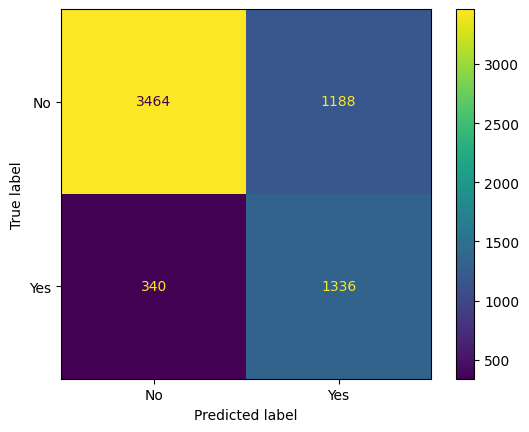

In [51]:
# 혼동행렬(confusion_matrix)을 그립니다.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

In [52]:
# 하지만 암환자를 예측한다든지 코로나 양성여부를 판단한다든지 할때는
# 1000명 검사자 중에 한 두 명만 양성일 수도 있습니다.
# 이럴 때 1명의 양성은 찾지 못했지만 다른 사람들이 음성인 것을 맞게 예측했다면 정확한 모델이 아님에도 정확도가 높게 나옵니다.
from sklearn.metrics import classification_report

report = classification_report(y_valid, y_predict)
print(report)

              precision    recall  f1-score   support

          No       0.90      0.74      0.81       511
         Yes       0.53      0.79      0.63       193

    accuracy                           0.75       704
   macro avg       0.72      0.76      0.72       704
weighted avg       0.80      0.75      0.76       704



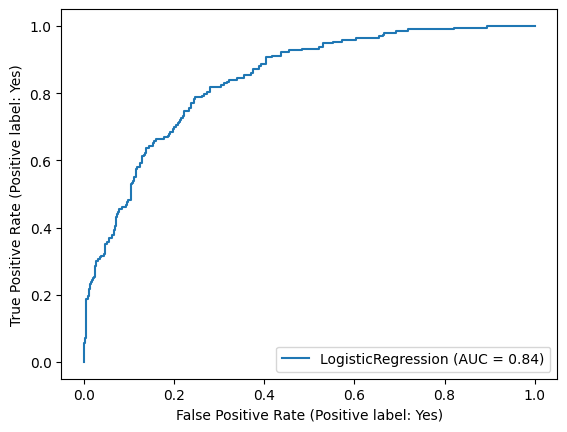

In [53]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_valid, y_valid)

In [54]:
# 예측 확률 계산
y_pred_prob = model.predict_proba(X_valid)[:, 1]
y_pred_prob[:5]

array([0.01177794, 0.23984371, 0.84708798, 0.23998076, 0.61004704])

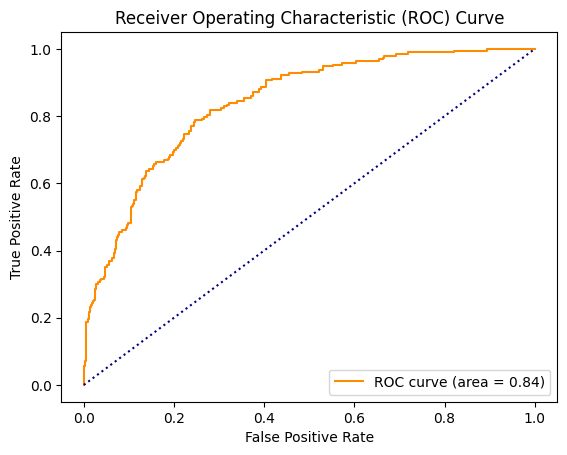

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve((y_valid == "Yes"), y_pred_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 혼동 행렬(confusion matrix)

<img src="https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fa7fb3ffc-5c0e-4db5-89c6-021994823e01%2FUntitled.png&blockId=d5474d00-6501-48b7-a9a1-59d5bbb640d8" width="500">

* https://driip.me/3ef36050-f5a3-41ea-9f23-874afe665342

### 기본 용어

* true positives (TP): 참으로 예측하고, 실제로 참이었던 경우
* true negatives (TN): 거짓으로 예측하고, 실제로 거짓이었던 경우
* false positives (FP): 참으로 예측했지만 거짓이었던 경우 (Type I error)
* false negatives (FN): 거짓으로 예측했지만 참이었던 경우 (Type II error)

### 정확도(Accuracy)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7bfe40cea126a04004b82f729cf7df1ec435fbf6"/>

* (TP+TN) / (TP+TN+FP+FN)
* 전체 범위에서, 정확히 예측한 경우에 대한 비율을 의미합니다.
* 일상적인 상황에서 예측의 성능에 대해서 이야기할 때, 정확도를 이야기합니다.
* https://en.wikipedia.org/wiki/Accuracy_and_precision


### 정확도의 문제점

* 이진분류(binary classification)에서 예측의 성능을 평가하기 위한 도구입니다.
* 이진분류의 경우 정확도(Accuracy)로만 예측을 평가하기 어렵습니다.
* 주어진 상황이 불균형(imbalance)할 때, 많은 쪽으로 전부 예측할 경우 실제 예측 성능은 낮지만 정확도는 높기 때문입니다.
    + 99%가 정상이고, 1%가 불량인 제품의 제조공정에서 불량품을 예측하는 경우를 생각해보겠습니다.
    + 모두 정상이라고 판단할 경우 정확도는 99%지만, 이런 모델을 불량품 검출용으로 사용할 수는 없습니다.

### 정밀도(precision)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/26106935459abe7c266f7b1ebfa2a824b334c807"/>

* TP / (FP+TP)
* 참으로 예측한 것들 중에서 실제로 참이었던 경우입니다.

* https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8

### 재현율(recall)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4c233366865312bc99c832d1475e152c5074891b"/>

* TP / (FN+TP)
* 실제 값이 참이었던 것들 중에서 참으로 예측한 경우입니다.

* https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8

### F1 Score

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4179c69cf1dde8418c4593177521847e862e7df8"/>

* F1 점수는 정밀도와 재현율의 조화평균입니다.
* 정밀도와 재현율이 균형있게 올라야 F1 점수도 오르도록 되어 있습니다.
* https://en.wikipedia.org/wiki/F-score

### scikit-learn으로 지표 출력하기

* 혼동 행렬의 경우 sklearn.metrics.confusion_matrix()를 이용해 생성할 수 있습니다.
* sklearn에서는 앞에서 설명된 척도들을 쉽게 계산할 수 있도록 메서드로 제공하고 있습니다.
* 정확도의 경우 sklearn.metrics.accuracy_score()
* f1 점수의 경우 sklearn.metrics.f1_score()
* 정밀도의 경우 sklearn.metrics.precision_score()
* 재현도의 경우 sklearn.metrics.recall_score()
* 위와 같은 메서드를 이용해서 계산할 수 있습니다.
* 주요 지표에 대한 텍스트 보고서를 sklearn.metrics.classification_report()로 생성할 수 있습니다.
* 위에서 살펴본 지표들을 모두 포함합니다.
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### 표 해석하기
* precision은 위에서 설명한 정밀도를 의미합니다.
* recall은 위에서 설명한 재현도를 의미합니다.
* f1-score는 위에서 설명한 f1 점수를 의미합니다.
* support는 클래스의 실제 발생 횟수가 얼마인지 알려줍니다.
    * 따라서 support는 모델에 따라 달라지는 숫자가 아닙니다.
* accuracy는 위에서 설명한 정확도를 의미합니다.
* macro avg는 각 레이블에 대한 측정항목을 계산하고 가중치가 적용되지 않은 평균을 찾습니다. 이것은 레이블 불균형을 고려하지 않습니다.
* weighted avg는 각 레이블에 대한 메트릭을 계산하고 지원(각 레이블에 대한 실제 인스턴스 수)별로 가중치를 부여한 평균을 찾습니다.
* weighted avg는 가중 평균을 의미하고, macro avg는 가중되지 않은 평균을 의미합니다.

### 정확도와 f1 점수 차이
* 왜 정밀도와 재현도가 모두 0일까요?
* 그것은 모두 0으로 예측했기 때문입니다.
* 모두 거짓으로 예측했기 때문에, TP가 0이므로 정밀도, 재현도, f1 점수 모두 0으로 출력됩니다.
* 정확도는 약 0.998인데, f1 점수는 0점입니다.
* 이러한 차이 때문에 불균형한 데이터 분류 문제에서 한 지표만 가지고 모델을 신뢰하기 어렵습니다.